# Modele CNN

## Import des librairies

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

## Import des DataFrames

In [18]:
df = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

## Visualisation du dataset

In [19]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


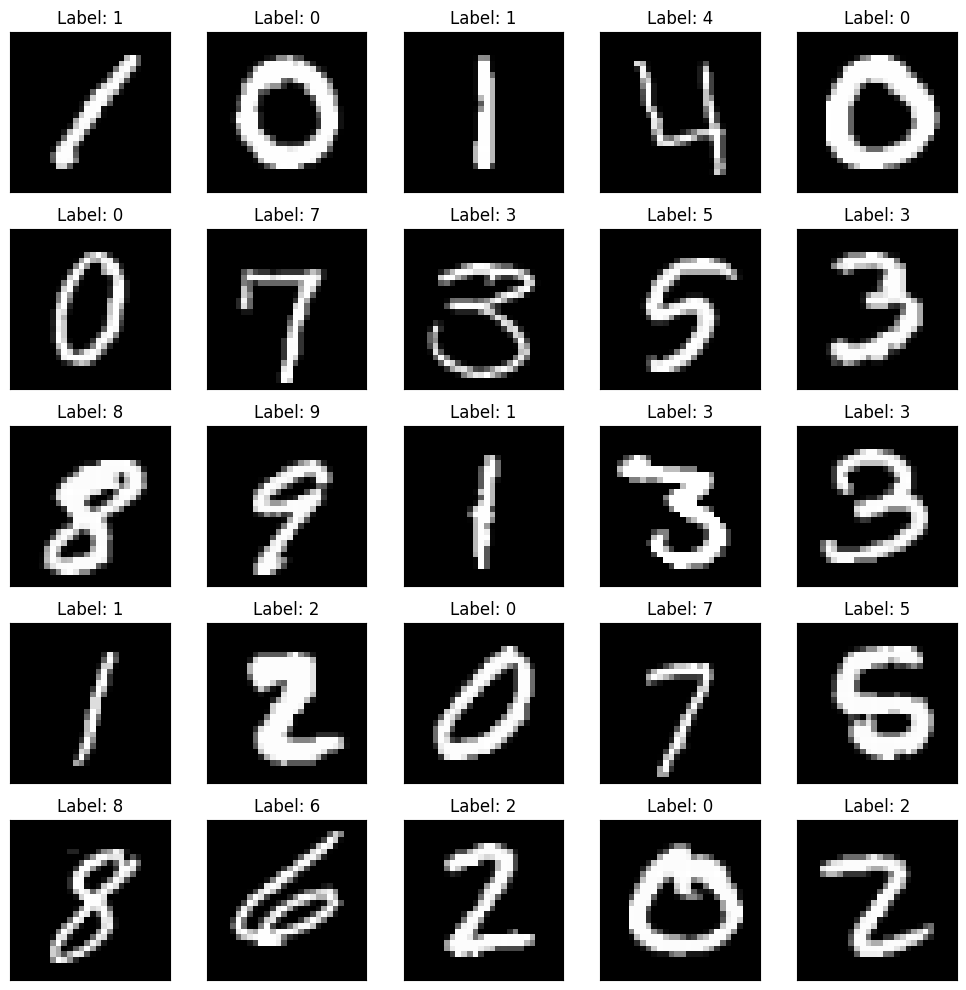

In [40]:
# Séparation des colonnes de données d'images et de labels
X = df.drop("label", axis=1).values.astype('float32')
y = df["label"].values.astype('int32')
print(X)
X = X.reshape(-1, 28, 28, 1) / 255.0
# Affichage des 25 premières images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Label: {y[i]}")
plt.tight_layout()
plt.show()

## Baseline CNN

Epoch 1/10
525/525 [==============================] - 9s 14ms/step - loss: 0.2481 - accuracy: 0.9212 - val_loss: 0.0657 - val_accuracy: 0.9808
Epoch 2/10
525/525 [==============================] - 7s 13ms/step - loss: 0.0672 - accuracy: 0.9790 - val_loss: 0.0792 - val_accuracy: 0.9752
Epoch 3/10
525/525 [==============================] - 7s 13ms/step - loss: 0.0425 - accuracy: 0.9870 - val_loss: 0.0445 - val_accuracy: 0.9869
Epoch 4/10
525/525 [==============================] - 8s 15ms/step - loss: 0.0362 - accuracy: 0.9879 - val_loss: 0.0404 - val_accuracy: 0.9880
Epoch 5/10
525/525 [==============================] - 8s 15ms/step - loss: 0.0263 - accuracy: 0.9912 - val_loss: 0.0433 - val_accuracy: 0.9865
Epoch 6/10
525/525 [==============================] - 9s 17ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0399 - val_accuracy: 0.9890
Epoch 7/10
525/525 [==============================] - 8s 16ms/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0412 - val_accuracy: 0.9882

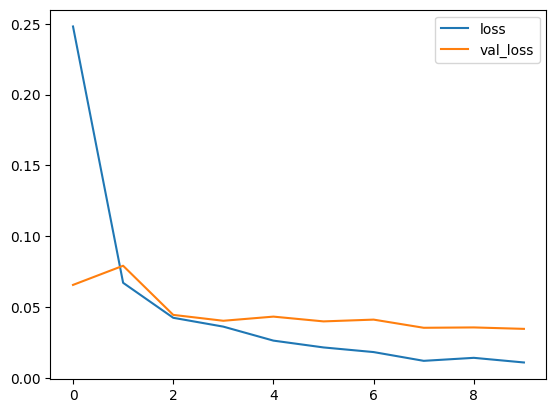

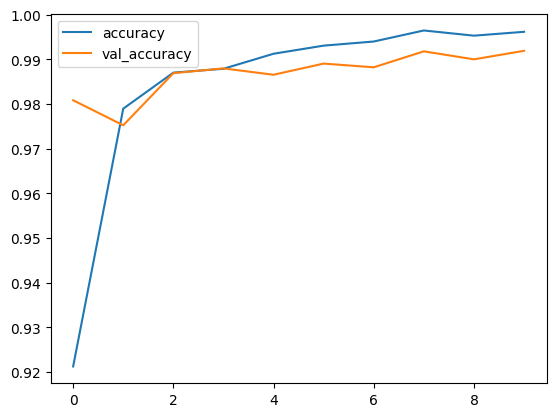

In [29]:
# Conversion des données d'images en un tableau Numpy et normalisation


# Création du modèle
model = models.Sequential([
    # Couche de convolution avec 32 filtres, kernel de 3x3 et activation ReLU
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Couche de pooling pour réduire la dimension de la sortie de la couche de convolution
    layers.MaxPooling2D((2, 2)),
    # Couche de convolution avec 64 filtres, kernel de 3x3 et activation ReLU
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Couche de pooling pour réduire la dimension de la sortie de la couche de convolution
    layers.MaxPooling2D((2, 2)),
    # Couche de convolution avec 128 filtres, kernel de 3x3 et activation ReLU
    layers.Conv2D(128, (3, 3), activation='relu'),
    # Aplatir les sorties des couches précédentes pour les entrées du réseau de neurones complètement connecté
    layers.Flatten(),
    # Couche de réseau de neurones complètement connecté avec 64 unités et activation ReLU
    layers.Dense(64, activation='relu'),
    # Couche de sortie avec 10 unités pour les 10 classes d'images et activation softmax pour la classification
    layers.Dense(10, activation='softmax')
])

# Compilation du modèle avec l'optimiseur Adam, la fonction de perte sparse_categorical_crossentropy pour une classification multiclasse et la métrique accuracy pour l'évaluation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle sur les données d'entraînement avec validation sur les données de test, avec 10 epochs et un batch_size de 64
history = model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

history_frame = pd.DataFrame(history.history)

history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [30]:
history_frame

,loss,accuracy,val_loss,val_accuracy
0,0.248141,0.921250,0.065672,0.980833
1,0.067159,0.978958,0.079201,0.975238
2,0.042462,0.987024,0.044507,0.986905
3,0.036217,0.987887,0.040355,0.987976
4,0.026341,0.991250,0.043284,0.986548
5,0.021526,0.993065,0.039916,0.989048
6,0.018252,0.993988,0.041170,0.988214
7,0.012065,0.996458,0.035402,0.991786
8,0.014186,0.995298,0.035653,0.990000
9,0.010907,0.996161,0.034638,0.991905


## Enregistrement du modele

In [27]:
model.save("CNN.h5")


## Essaie du modele sur le dataset test

In [84]:
from tensorflow.keras.models import load_model
df_test = pd.read_csv("data/test.csv")
model = load_model('CNN.h5')

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
df_test = df_test.values.astype('float32')
# Créer un générateur de données pour la prétraitement des images de test
df_test = df_test.reshape(-1, 28, 28, 1) / 255.0


In [86]:

predictions = model.predict(df_test)

# Obtenir les noms de classe prédits
predicted_class_indices = np.argmax(predictions, axis=1)
labels = ["0","1","2","3","4","5","6","7","8","9"]
predicted_classes = [labels[k] for k in predicted_class_indices]


875/875 [==============================] - 3s 4ms/step


In [97]:
import random

# Sélectionner 10 images au hasard avec leur prédiction
random.seed()
indices = random.sample(range(len(predicted_classes)), 10)
selected_images = [df_test[i] for i in indices]
selected_predictions = [predicted_classes[i] for i in indices]


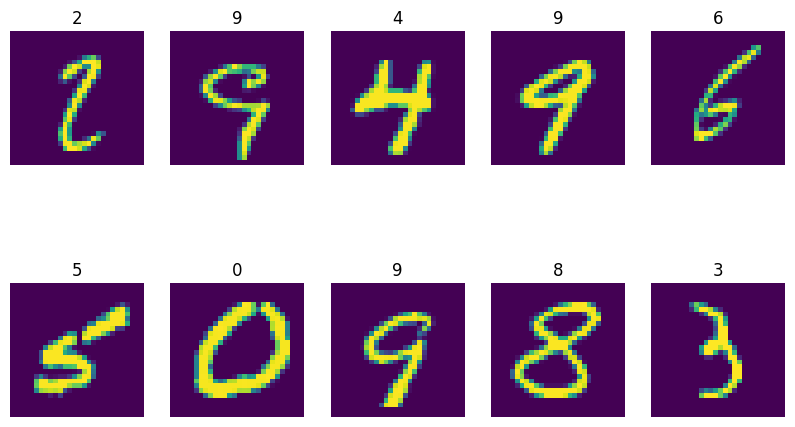

In [98]:
from PIL import Image

# Afficher les 10 images sélectionnées avec leur prédiction
fig, axes = plt.subplots(2, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    img =selected_images[i]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(selected_predictions[i])
plt.show()
